<a href="https://colab.research.google.com/github/tskmr/Reliability/blob/main/Lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
t = c( 94,  96,  99,  99, 104, 108, 112, 114, 117, 117, 118, 121, 121, 123, 129, 131, 133, 135, 136, 139, 139, 140, 141, 141, 143, 144, 149, 149, 152, 153, 159, 159, 159, 159, 162, 168, 168, 169,  170, 170, 171, 172, 173, 176, 177, 180, 180, 184, 187, 188, 189, 190, 196, 197, 203, 205, 211, 213, 224, 226, 227, 256, 257, 269, 271, 274, 291)
n = length(t)
i = seq_along(t)
p = (i-.5)/n
d = data.frame(t, n, i, p)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



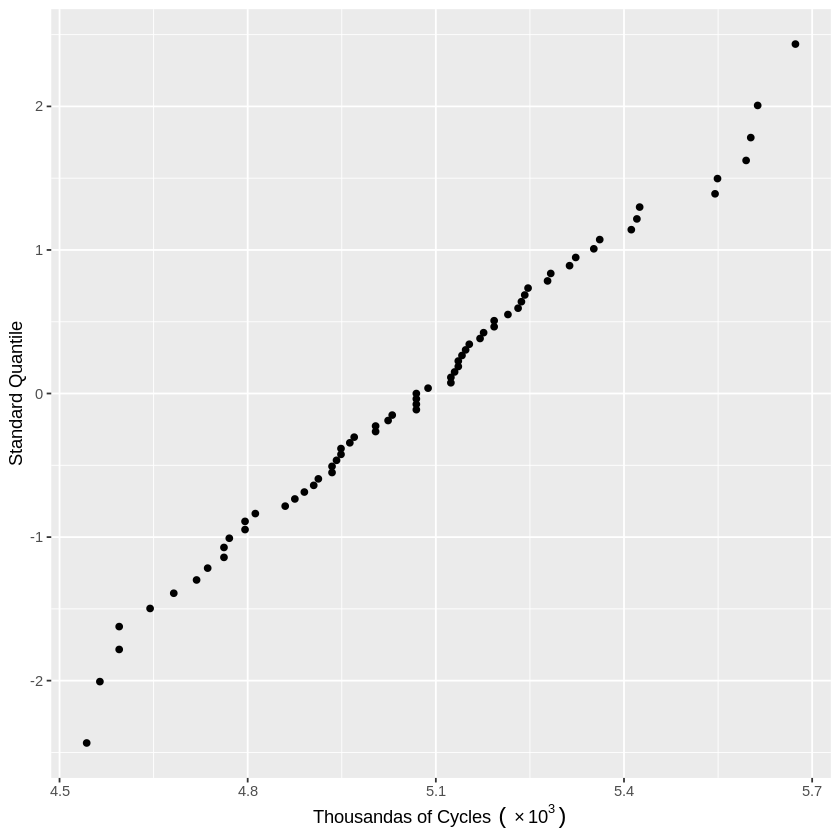

In [ ]:
plotAlloy = d %>% ggplot()+
  xlab(expression(paste("Thousandas of Cycles", " ", ("" %*% 10^3))))+
  ylab("Standard Quantile")
d = d %>% mutate(log_t = log(t), invNor = qnorm(p))
plotAlloy + geom_point(data=d, aes(x=log_t, y=invNor))

In [ ]:
least.square = function(x, y){
  X = matrix(c(rep(1, length(x)), x), ncol=2)
  Y = matrix(y)
beta = solve(t(X)%*%X)%*%t(X)%*%Y
  return(beta)
}

In [ ]:
x = d$log_t
y = d$invNor
par = least.square(x, y)
par

-18.357096
3.617125


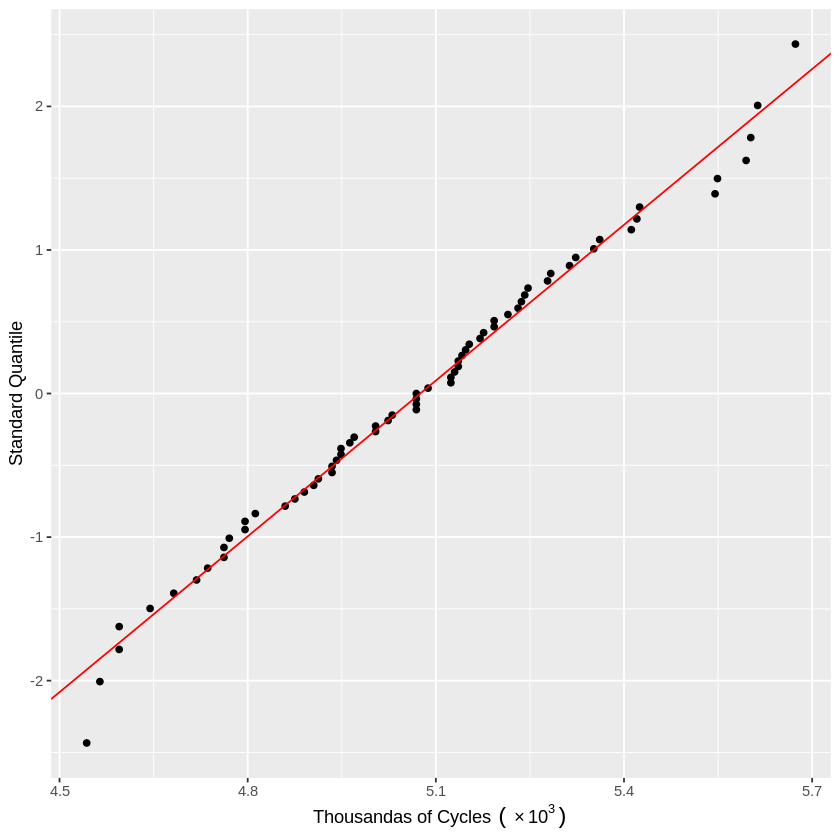

In [ ]:
plotAlloy + geom_point(data=d, aes(x=log_t, y=invNor))+ geom_abline(intercept= par[1], slope=par[2], col="red")

In [ ]:
hatsigma = 1/par[2]
hatmu = -par[1]*hatsigma
c(hatmu, hatsigma)

[1] 5.0750509 0.2764626

In [ ]:
d = d %>% mutate(hatp = pnorm((x-hatmu)/hatsigma))
d %>% select(t, p, hatp)

t,p,hatp
<dbl>,<dbl>,<dbl>
94,0.007462687,0.02721313
96,0.022388060,0.03235359
99,0.037313433,0.04128450
99,0.052238806,0.04128450
104,0.067164179,0.05964612
108,0.082089552,0.07762354
112,0.097014925,0.09857857
114,0.111940299,0.11016110
117,0.126865672,0.12887709


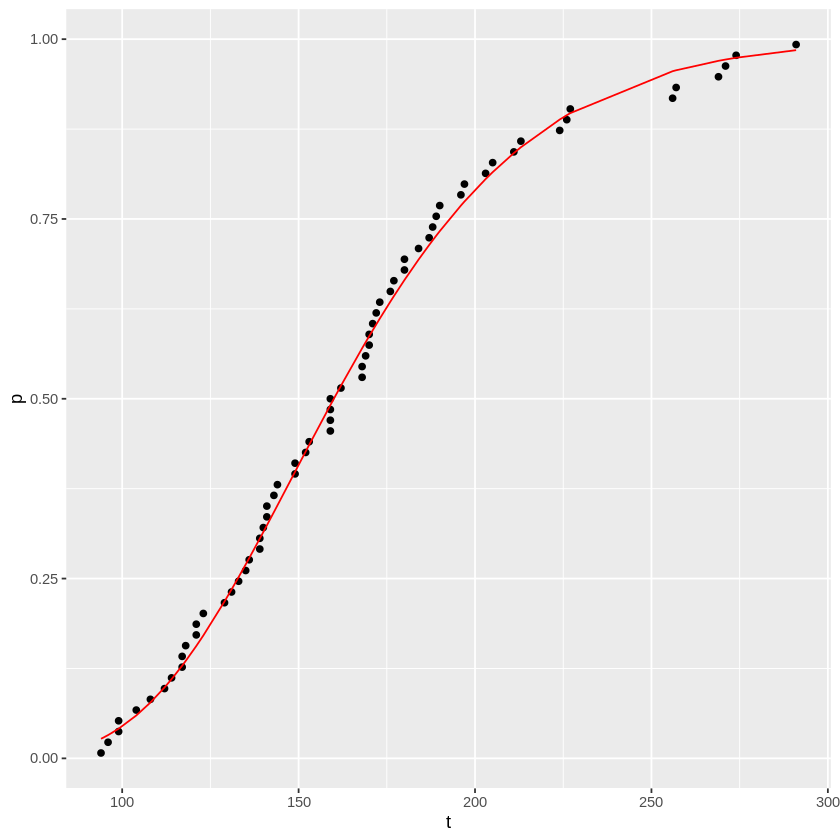

In [ ]:
d %>%
  ggplot()+
geom_point(aes(t, p))+
geom_line(aes(t, hatp), col="red")

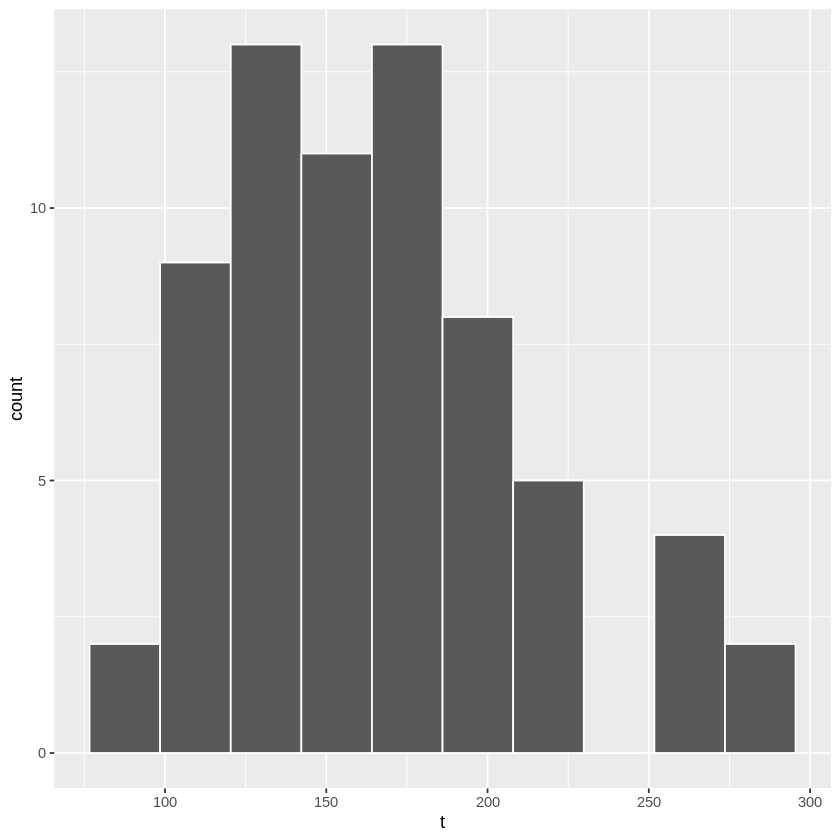

In [ ]:
d %>% ggplot() + geom_histogram(aes(t), bins=10, col="white")

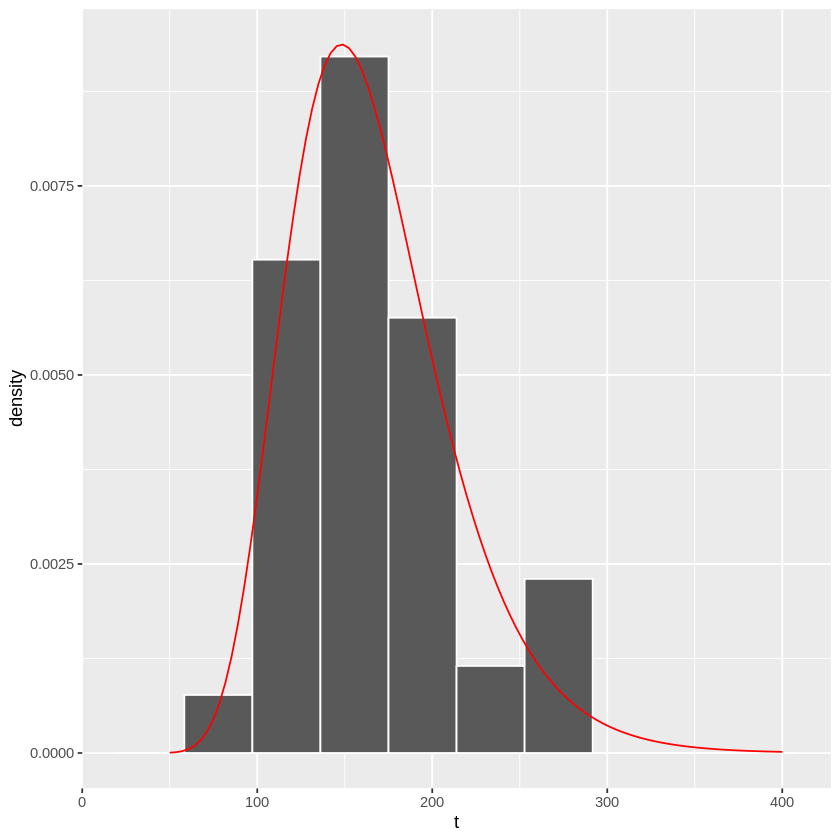

In [ ]:
data.frame(t1=seq(50, 400, len=100)) %>% mutate( hat.density = 1/(hatsigma*t1) * dnorm( (log(t1)-hatmu)/ hatsigma) ) -> d1
d %>% ggplot() + geom_histogram(aes(t, ..density.. ), bins=10, col="white") + geom_line(data=d1, aes(t1, hat.density), col="red")

In [ ]:
expectation = exp(hatmu+hatsigma^2/2)
variance = exp(2*hatmu+hatsigma^2)*(exp(hatsigma^2)-1)
c(expectation, variance)

[1]  166.2124 2194.3327

In [ ]:
t1 = exp(hatmu + hatsigma * qnorm(0.01))
t10 = exp(hatmu + hatsigma * qnorm(0.1))
t50 = exp(hatmu + hatsigma * qnorm(0.5))
t99 = exp(hatmu + hatsigma * qnorm(0.99))
data.frame(t1, t10, t50, t99)

t1,t10,t50,t99
<dbl>,<dbl>,<dbl>,<dbl>
84.09126,112.2524,159.9803,304.3563


## ワイブル分布

-23.022453
4.423522


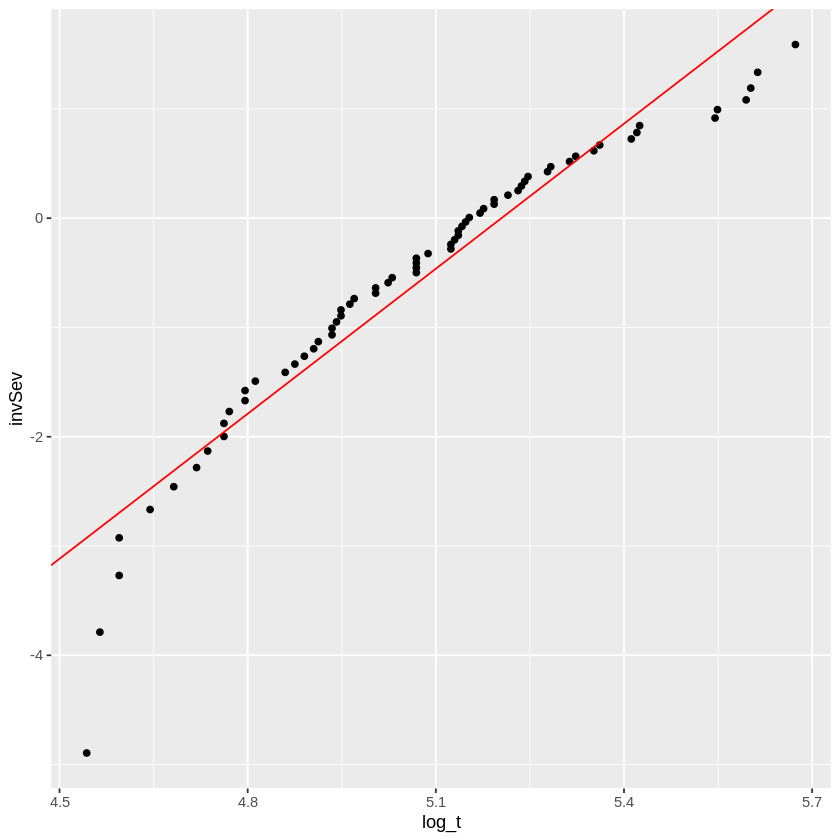

In [ ]:

qsev <- function(p){ log(-log(1-p)) }
#d %>% mutate(log_t = log(t), invSev = qsev(p)) %>% ggplot()+ geom_point(aes(log_t, invSev))

x = log(d$t)
yw = qsev(d$p)
parWeibull = least.square(x, yw)
parWeibull
d %>% mutate(log_t = log(t), invSev = qsev(p)) %>% ggplot()+ geom_point(aes(log_t, invSev))+geom_abline(intercept= parWeibull[1], slope=parWeibull[2], col="red")
